###**Regression**

####**Datos**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('House Price Prediction Dataset.csv')
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


####**EDA**

In [5]:
df.drop(['Id'], axis=1, inplace=True)
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,2000.0,2786.2095,1295.146799,501.0,1653.0,2833.0,3887.5,4999.0
Bedrooms,2000.0,3.0035,1.424606,1.0,2.0,3.0,4.0,5.0
Bathrooms,2000.0,2.5525,1.108990,1.0,2.0,3.0,4.0,4.0
Floors,2000.0,1.9935,0.809188,1.0,1.0,2.0,3.0,3.0
YearBuilt,2000.0,1961.4460,35.926695,1900.0,1930.0,1961.0,1993.0,2023.0
Price,2000.0,537676.8550,276428.845719,50005.0,300098.0,539254.0,780086.0,999656.0


In [7]:
#df['Condition'].unique()
df['Condition'].value_counts()

,count
Condition,
Fair,521
Excellent,511
Poor,507
Good,461


Se genera un orden de las categorias

In [20]:
from sklearn.preprocessing import OrdinalEncoder
condition_categories = [['Poor', 'Fair', 'Good', 'Excellent']]
ordinal_encoder = OrdinalEncoder(categories=condition_categories)
df['Condition'] = ordinal_encoder.fit_transform(df[['Condition']])

In [10]:
df['Location'].value_counts()

,count
Location,
Downtown,558
Urban,485
Suburban,483
Rural,474


In [21]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['Location']
categorical_encoder = LabelEncoder()
df['Location'] = categorical_encoder.fit_transform(df['Location'])

In [23]:
df['Location'].value_counts()  ## 0 - DownTown -1. Rural -2. Suburban  -3. Urban

,count
Location,
0,558
3,485
2,483
1,474


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Garage'] = le.fit_transform(df['Garage'])


In [25]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,0,3.0,0,149919
1,4272,5,4,3,1958,0,3.0,0,424998
2,3592,2,2,3,1938,0,2.0,0,266746
3,966,4,2,2,1902,2,1.0,1,244020
4,4926,1,4,2,1975,0,1.0,1,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,0.0,0,295620
1996,3046,5,2,1,2019,2,0.0,1,580929
1997,1062,5,1,2,1903,1,0.0,0,476925
1998,4062,3,1,2,1936,3,3.0,1,161119


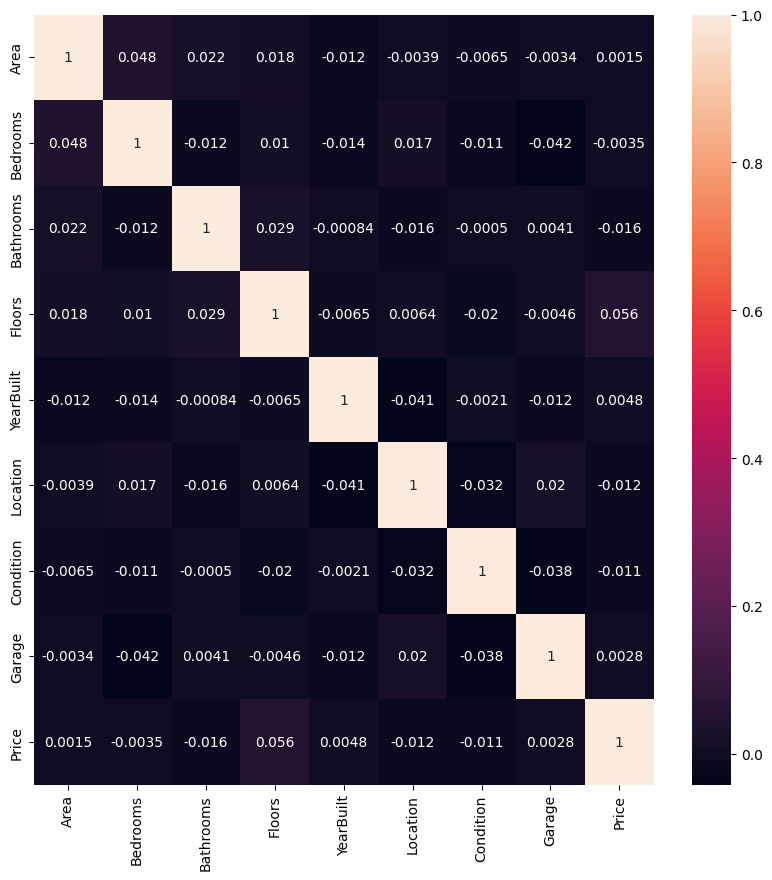

In [28]:
df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
df.isnull().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [39]:
averagePricePerLocation = df.groupby('Location')['Price'].transform('mean')
df['LocationRatio'] = df['Price'] / averagePricePerLocation
df.head()

   Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  Garage  \
0  1360         5          4       3       1970         0        3.0       0   
1  4272         5          4       3       1958         0        3.0       0   
2  3592         2          2       3       1938         0        2.0       0   
3   966         4          2       2       1902         2        1.0       1   
4  4926         1          4       2       1975         0        1.0       1   

    Price  LocationRatio  
0  149919       0.279668  
1  424998       0.792818  
2  266746       0.497605  
3  244020       0.437770  
4  636056       1.186540  


In [41]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,LocationRatio
0,1360,5,4,3,1970,0,3.0,0,149919,0.279668
1,4272,5,4,3,1958,0,3.0,0,424998,0.792818
2,3592,2,2,3,1938,0,2.0,0,266746,0.497605
3,966,4,2,2,1902,2,1.0,1,244020,0.437770
4,4926,1,4,2,1975,0,1.0,1,636056,1.186540
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,0.0,0,295620,0.530340
1996,3046,5,2,1,2019,2,0.0,1,580929,1.042182
1997,1062,5,1,2,1903,1,0.0,0,476925,0.885467
1998,4062,3,1,2,1936,3,3.0,1,161119,0.310463


####**TRAIN - TEST**

In [42]:
#X = df3[df3.columns.difference(['Price', 'ord_Condition', 'Bedrooms','Bathrooms'])]
X = df[['LocationRatio']]
Y = df['Price']

In [43]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

####**REGRESSION LINEAR**

In [44]:
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [45]:
ypred = reg.predict(test_x)

In [46]:
print("R_2 score is:" , r2_score(test_y, ypred))
print("MSE is:" , mean_squared_error(test_y, ypred))

R_2 score is: 0.9968109823520372
MSE is: 248101837.14078575


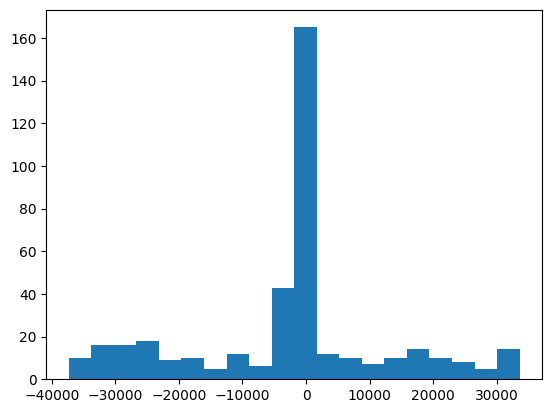

In [47]:
plt.hist(ypred-test_y, bins=20)
plt.show()

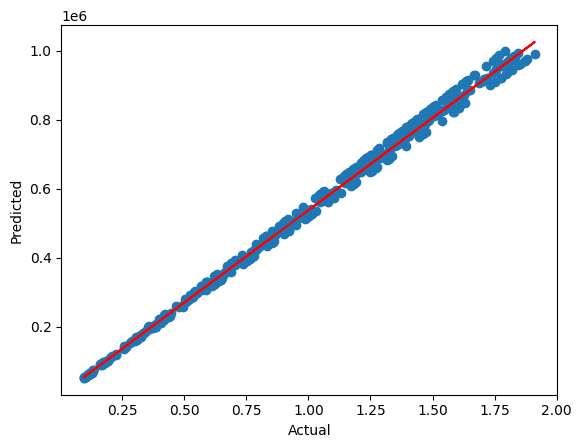

In [52]:
plt.plot(test_x, reg.intercept_ + reg.coef_*test_x, c = 'red')
plt.scatter(test_x, test_y)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [55]:
# Define el grado del polinomio (por ejemplo, grado=2)
degree = 3

# Crea el modelo usando make_pipeline para combinar PolynomialFeatures y LinearRegression
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrena el modelo
polyreg.fit(train_x, train_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [56]:
ypred = polyreg.predict(test_x)

# Calcula las métricas de evaluación
r2 = polyreg.score(test_x, test_y)
mse = np.sqrt(mean_squared_error(test_y, ypred)/np.mean(ypred)*100)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.9970113489191333
MSE: 207.13590938177717
